In [4]:
# 1. Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [5]:
# 2. Load dataset
df = pd.read_csv('advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
if 	'Unnamed: 0' in df.columns :
      df = df.drop('Unnamed: 0' , axis = 1)

In [8]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [9]:
# 5. Summary and check
print("\nInfo:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None

Missing values:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


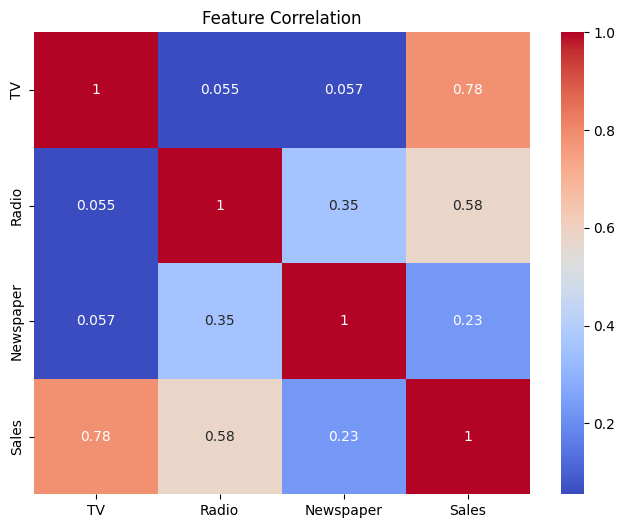

In [11]:
# 6. Correlation heatmap
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(),annot = True, cmap = 'coolwarm')
plt.title("Feature Correlation")
plt.show()


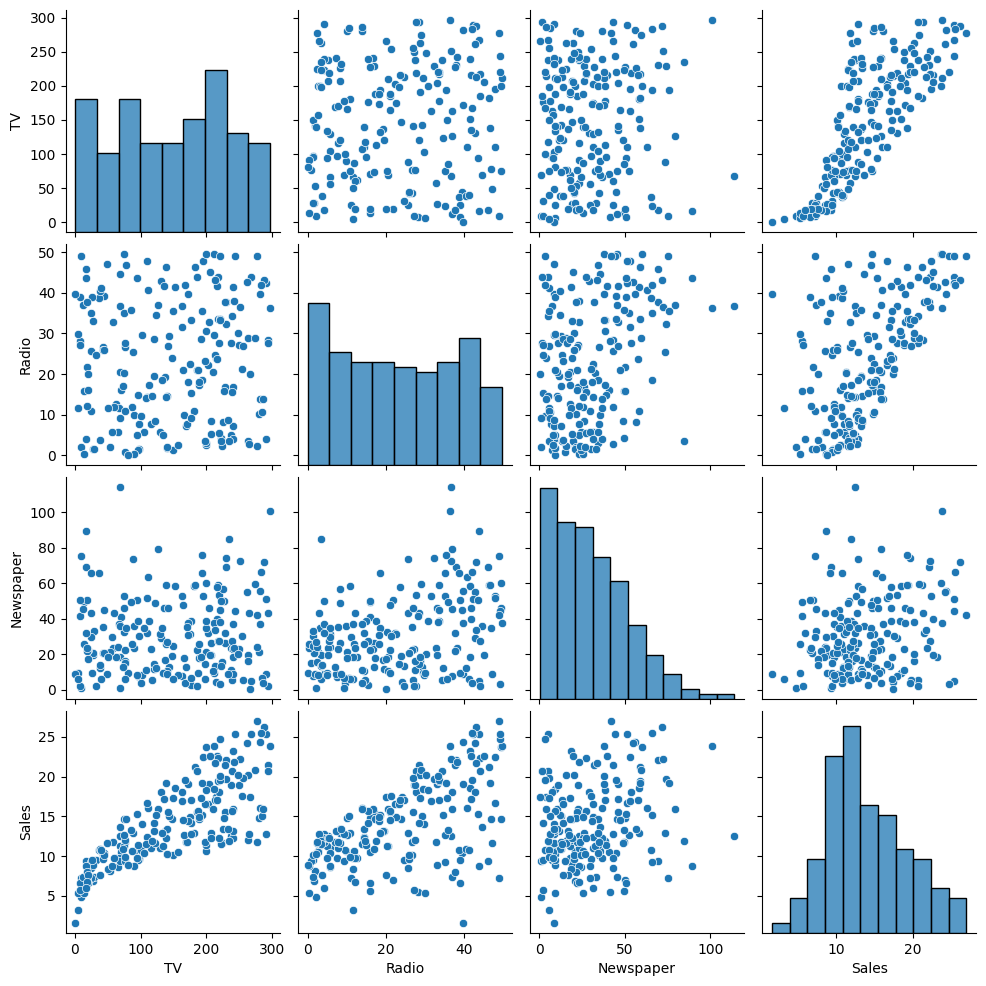

In [12]:
# 7. Pairplot
sns.pairplot(df)
plt.show()

In [19]:
X = df[['TV','Radio','Newspaper']]# independent data - feature
y = df['Sales'] # dependent data - label 


In [20]:
# 9. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# 10. Train the model
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:
# 11. Model coefficients
print("\nModel Coefficients:")
print(f"Intercept: {model.intercept_}")
print(f"TV: {model.coef_[0]}")
print(f"Radio: {model.coef_[1]}")
print(f"Newspaper: {model.coef_[2]}")



Model Coefficients:
Intercept: 2.979067338122629
TV: 0.044729517468716326
Radio: 0.18919505423437652
Newspaper: 0.0027611143413671935


In [23]:
y_pred = model.predict(X_test)
y_pred

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

In [27]:
# 13. Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nMean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 3.17
R² Score: 0.90


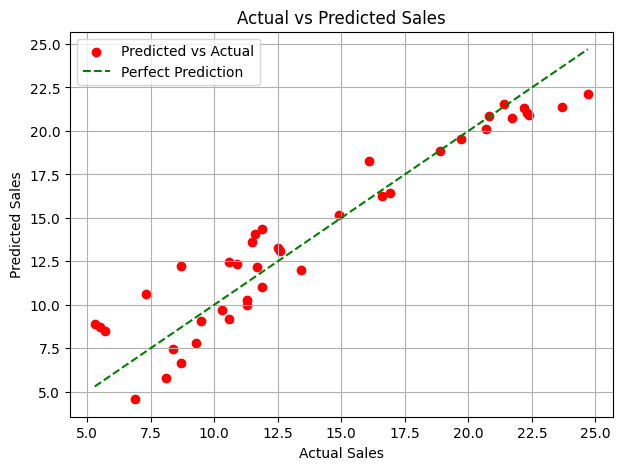

In [34]:

# 14. Plot predictions


# 14. Plot predictions with legend
plt.figure(figsize=(7, 5))

# Scatter plot for predictions
plt.scatter(y_test, y_pred, color='red', label='Predicted vs Actual')

# Line for perfect prediction
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='green', label='Perfect Prediction')

plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.grid(True)
plt.legend()  # Add this line to show the legend
plt.show()
